In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA


In [143]:
def fetch_dataset(filename: str):
    return np.array(pd.read_csv(filename, header=0))


# K-elbow


In [144]:
url = "https://raw.githubusercontent.com/G-Nozawa/K-Means-Elbow-method/main/dados/dados_parte2.csv"
data = fetch_dataset(url)


# Separar e plotar os dados em K clusters


In [150]:
def classify_data(data: np.ndarray, n: int):
    # Fit the model with n clusters
    k_means = KMeans(n_clusters=n)
    k_means.fit(data)

    # Append label (its cluster) to data
    labels = k_means.predict(data).reshape((-1, 1))
    labeled_data = np.hstack((data, labels))

    # Reduce the dimension of data to 2D
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(labeled_data)

    # Sort the data by cluster
    pca_clusters = []
    for i in range(n):
        sum = []
        for d in range(len(pca_fit)):
            if labels[d] == i:
                sum.append(pca_fit[d])
        sum = np.vstack(sum)
        pca_clusters.append(sum)

    # Plot the reduced data
    plt.figure(figsize=(10, 10), dpi=75)
    for i in range(n):
        plt.scatter(
            pca_clusters[i][:, 0], pca_clusters[i][:, 1], alpha=0.8, label=i + 1
        )
    x, y = "Eixo X", "Eixo Y"
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title("Clusters com PCA - " + str(n) + " clusters")
    plt.legend()
    plt.show()

    # Plot graphics
    clusters = []
    for i in range(n):
        sum = []
        for d in range(len(data)):
            if labels[d] == i:
                sum.append(data[d])
        sum = np.vstack(sum)
        clusters.append(sum)
    plt.figure(figsize=(10, 4), dpi=75)

    for c in range(n):
        aux = n // 2 if n % 2 == 0 else n // 2 + 1
        plt.subplot(2, aux, c + 1)
        plt.plot(clusters[c].mean(axis=0), "o-")
        plt.title("Cluster " + str(c + 1))
        plt.ylim(0, 5)


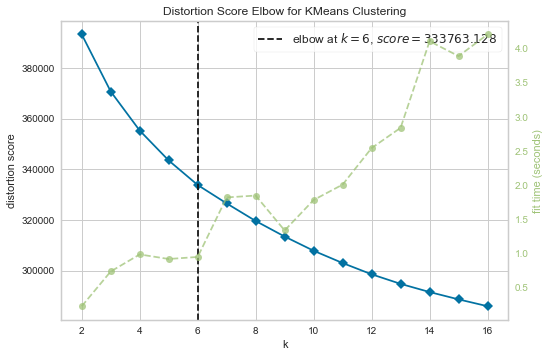

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [146]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 17))
visualizer.fit(data)
visualizer.poof()


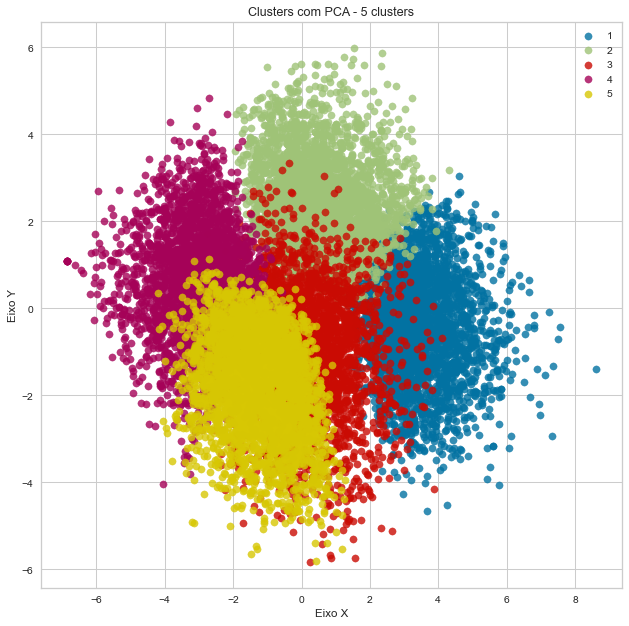

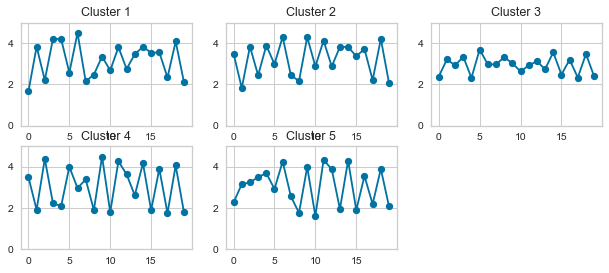

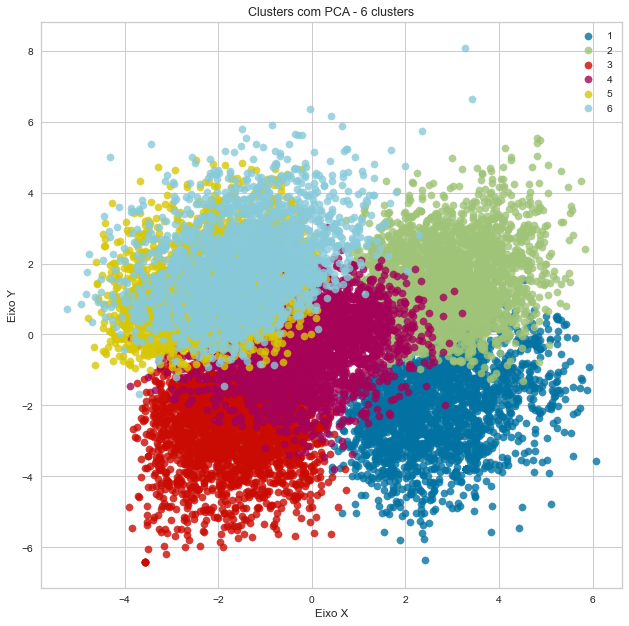

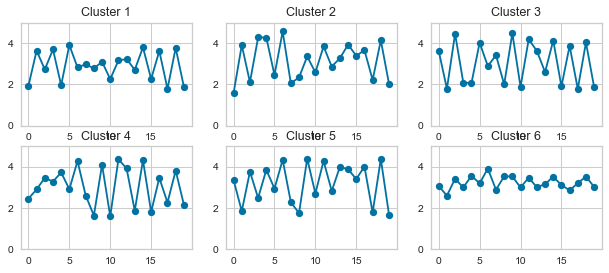

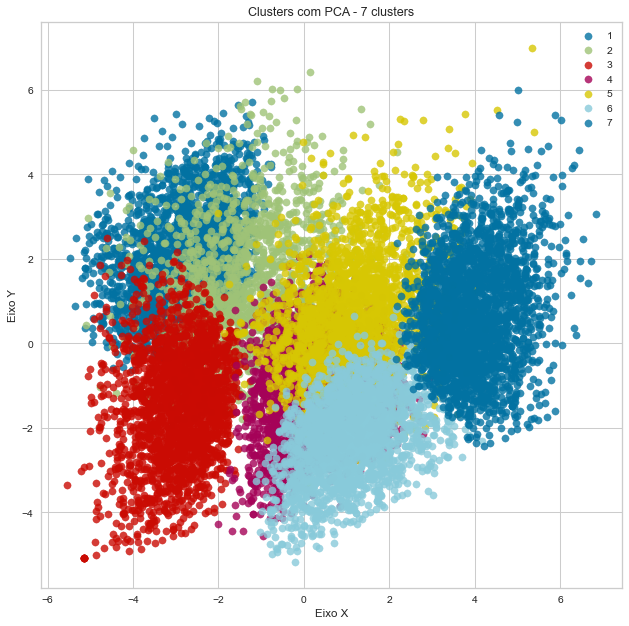

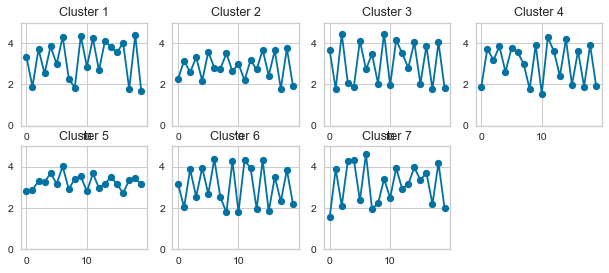

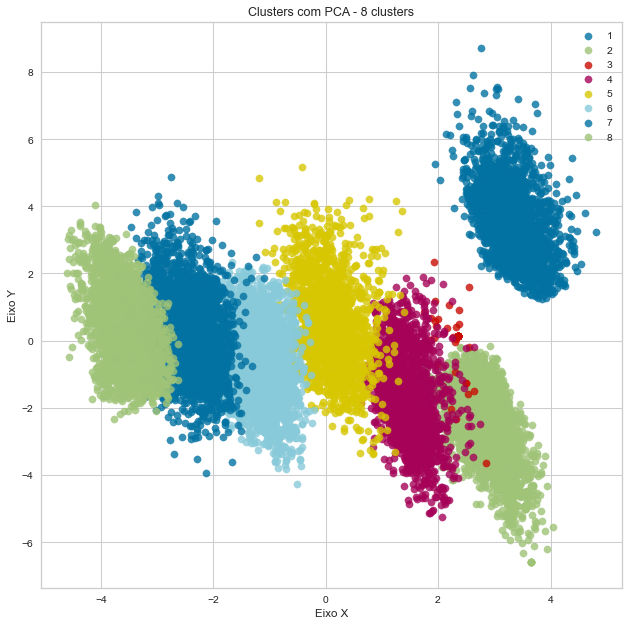

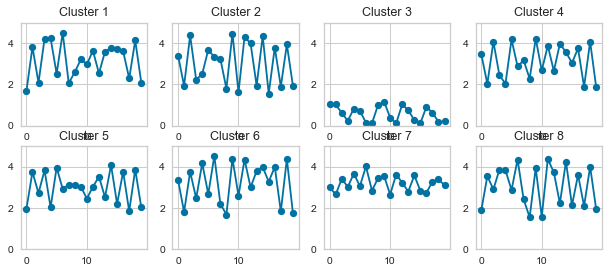

In [151]:
n = visualizer.elbow_value_
if n >= 2:
    classify_data(data, n - 1)
classify_data(data, n)
classify_data(data, n + 1)
classify_data(data, n + 2)
